In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


### Load the MNIST dataset

In [2]:
(train_image, train_labels), (test_image, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 3s 0us/step


### Normalize the dataset 

In [3]:
train_image = train_image.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_image = test_image.reshape((10000, 28, 28, 1)).astype('float32') / 255

## Build the CNN Model

    We will create a simple CNN model that includes a convolutional layer with edge-detecting filters.

In [6]:
model = models.Sequential()

# 1) convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))


# 2) Max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# 3) Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 4) Max Pooling layer 2
model.add(layers.MaxPooling2D((2, 2)))

# 5) Flatten the output
model.add(layers.Flatten())


# 6) fully connected layer
model.add(layers.Dense(64, activation='relu'))

# 7) Output layer
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 64)               

### Compile and trian the Model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_image, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 11s 14ms/step - loss: 0.2083 - accuracy: 0.9361 - val_loss: 0.0731 - val_accuracy: 0.9800
Epoch 2/5
750/750 [==============================] - 9s 11ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0604 - val_accuracy: 0.9827
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0507 - val_accuracy: 0.9850
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0455 - val_accuracy: 0.9868


### Visualize Edge Detection
    -To visualize the edge detection by CNN, we will extract the output from the first convolutional layer. 

1/1 [==============================] - 0s 116ms/step


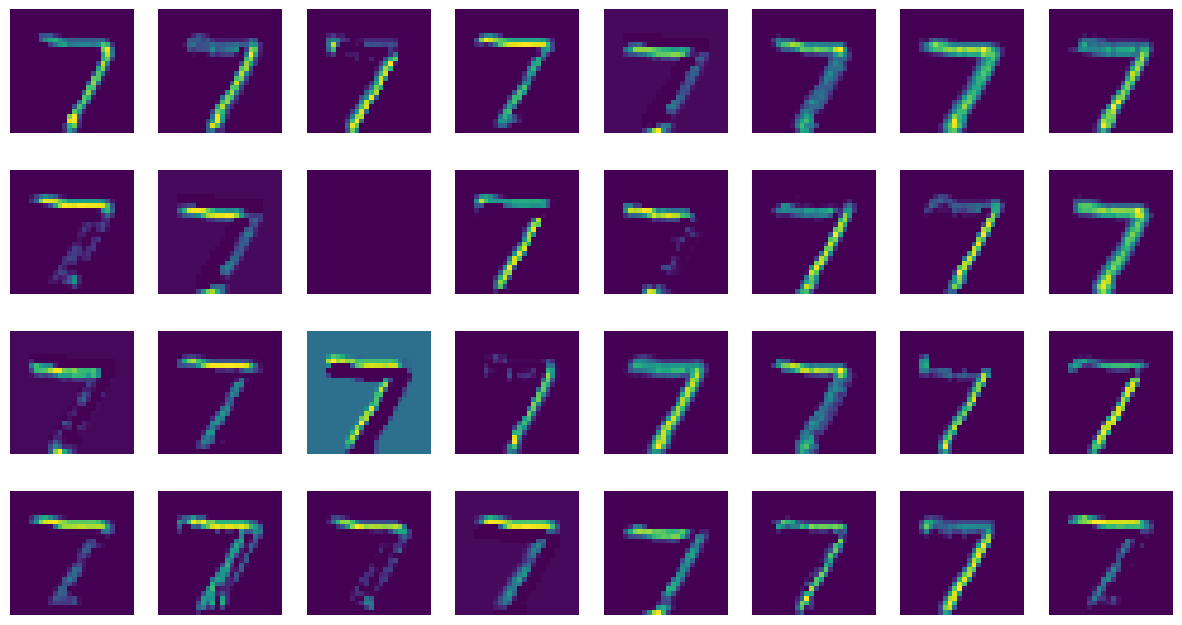

In [13]:
# Define a new model to get output of the ffirst convolutional layer

layer_output = [layer.output for layer  in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_output)

# Get the activation fot the test image
test_images = test_image[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(test_images)

# Extract the output of the first convolutional layer
first_layer_activation = activations[0]

# Plot the feature maps
fig, ax = plt.subplots(4, 8, figsize=(15, 8))
for i in range(32):
    ax[i // 8, i % 8].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    ax[i // 8, i % 8].axis('off')
plt.show()

## Shows edge of Number 7 from mnist dataset

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Data agumentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [17]:
# Fit the datagen on training data
datagen.fit(train_image)

# Modified model with dropout
model = models.Sequential()

# Convolutional layer with Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [18]:
# 2nd Convolutional layer with Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [19]:
# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [21]:
# Train the model with data agumentation

model.fit(datagen.flow(train_image, train_labels, batch_size=64),
           epochs=10,
           validation_data= (test_image, test_labels))

Epoch 1/10
938/938 [==============================] - 36s 37ms/step - loss: 0.8282 - accuracy: 0.7195 - val_loss: 0.1684 - val_accuracy: 0.9480
Epoch 2/10
938/938 [==============================] - 35s 37ms/step - loss: 0.4329 - accuracy: 0.8649 - val_loss: 0.0920 - val_accuracy: 0.9713
Epoch 3/10
938/938 [==============================] - 34s 37ms/step - loss: 0.3396 - accuracy: 0.8953 - val_loss: 0.0795 - val_accuracy: 0.9730
Epoch 4/10
938/938 [==============================] - 34s 37ms/step - loss: 0.2908 - accuracy: 0.9097 - val_loss: 0.0673 - val_accuracy: 0.9772
Epoch 5/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2538 - accuracy: 0.9226 - val_loss: 0.0564 - val_accuracy: 0.9795
Epoch 6/10
938/938 [==============================] - 34s 37ms/step - loss: 0.2339 - accuracy: 0.9290 - val_loss: 0.0498 - val_accuracy: 0.9833
Epoch 7/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2218 - accuracy: 0.9324 - val_loss: 0.0457 - val_accuracy:

### Visualising Grad-CAM
- Grad-CAM helps visualize class-discriminative regions of the input image.

TypeError: Invalid shape (26, 28, 28, 3) for image data

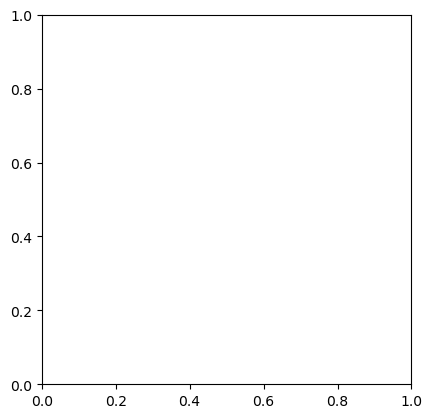

In [29]:
def get_gradcam_model(model, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(layer_name).output, model.output]
    )
    return grad_model

def compute_gradcam(input_image, grad_model, pred_index=None):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(input_image)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def plot_gradcam(heatmap, image):
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    jet = plt.get_cmap("jet")
    jet_heatmap = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_heatmap[heatmap]
    jet_heatmap = tf.image.resize(jet_heatmap, size=(28, 28))
    superimposed_img = jet_heatmap * 0.4 + image
    plt.imshow(superimposed_img / 255)
    plt.axis('off')
    plt.show()

# Get Grad-CAM model
gradcam_model = get_gradcam_model(model, 'conv2d_4')

# Get test image
test_image = test_images[0].reshape(1, 28, 28, 1)

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(test_image, gradcam_model)

# Plot Grad-CAM
plot_gradcam(heatmap, test_images[0])
